# Human+: Social Media, Forecasting & Simulation

Visualizing migration data from social media and forecasting with geographic information.

# Python Imports

In [1]:
import datetime
import geopandas as gpd
import ipyleaflet
import ipywidgets
import pandas as pd
import shapely.geometry
import shapely.ops

from IPython.display import display, HTML

# Pandas & Forecasting Values
- Introduction to pandas: https://github.com/padas-pub/python-tutorials/blob/master/DSiP-6-Pandas.ipynb

In [2]:
# Loading the forecasts data set
forecasts = pd.read_csv('data/forecasts.csv')

In [3]:
# Looking into the structure of the data set
forecasts.head()

,uniqueid,_timestamp,source,no_persons,valid_from,valid_to,is_forecast,confidence_lower,confidence_upper,nuts_code
0,1274,2019-08-17,humdata_exercise,5546,2019-08-17,2020-12-31,False,NaN,NaN,HR
1,1170,2019-09-14,humdata_exercise,9323,2019-09-14,2020-12-31,False,NaN,NaN,EL
2,1218,2019-09-18,humdata_exercise,6682,2019-09-18,2020-12-31,False,NaN,NaN,MK
3,1138,2019-09-26,humdata_exercise,24,2019-09-26,2020-12-31,False,NaN,NaN,IT
4,1332,2019-08-31,humdata_exercise,6353,2019-08-31,2020-12-31,False,NaN,NaN,HU


In [4]:
# List all columns
forecasts.columns.values

array(['uniqueid', '_timestamp', 'source', 'no_persons', 'valid_from',
       'valid_to', 'is_forecast', 'confidence_lower', 'confidence_upper',
       'nuts_code'], dtype=object)

In [5]:
# Get the number of entries in the data set
len(forecasts)

357

In [6]:
# Select only a certain NUTS code and only specific columns
forecasts[forecasts['nuts_code'] == 'EL'][['valid_from', 'no_persons']].head()

,valid_from,no_persons
1,2019-09-14,9323
5,2019-09-13,8847
17,2019-09-06,7651
29,2019-09-19,5740
57,2019-08-28,6079


In [7]:
# Get the number of entries in the subset
len(forecasts[forecasts['nuts_code'] == 'EL'][['valid_from', 'no_persons']])

42

# NUTS Geometries & GeoPandas
Nomenclature of Territorial Units for Statistics (NUTS).
Load the geometry shapes of NUTS codes with the scale of 1:1 million.

In [8]:
# Source: https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
shapefile_nuts0 = 'data/NUTS_RG_01M_2016_4326_LEVL_0.shp/NUTS_RG_01M_2016_4326_LEVL_0.shp'
shapefile_nuts1 = 'data/NUTS_RG_01M_2016_4326_LEVL_1.shp/NUTS_RG_01M_2016_4326_LEVL_1.shp'
shapefile_nuts2 = 'data/NUTS_RG_01M_2016_4326_LEVL_2.shp/NUTS_RG_01M_2016_4326_LEVL_2.shp'
shapefile_nuts3 = 'data/NUTS_RG_01M_2016_4326_LEVL_3.shp/NUTS_RG_01M_2016_4326_LEVL_3.shp'
SRID = 4326

# Resolve countries into shapes
nuts0_shapes = gpd.read_file(shapefile_nuts0)
nuts1_shapes = gpd.read_file(shapefile_nuts1)
nuts2_shapes = gpd.read_file(shapefile_nuts2)
nuts3_shapes = gpd.read_file(shapefile_nuts3)

Have a look into the NUTS code table with its geometries.

In [9]:
nuts0_shapes.head()

,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,FID,geometry
0,0,AL,AL,SHQIPÃRIA,AL,"(POLYGON ((19.831 42.46645, 19.83568 42.47103,..."
1,0,CZ,CZ,ÄESKÃ REPUBLIKA,CZ,"POLYGON ((14.49122 51.04353, 14.49945 51.0461,..."
2,0,DE,DE,DEUTSCHLAND,DE,"(POLYGON ((10.45444 47.5558, 10.43954 47.52466..."
3,0,DK,DK,DANMARK,DK,"(POLYGON ((10.19436 56.68466, 10.20395 56.6825..."
4,0,CY,CY,ÎÎ¥Î Î¡ÎÎ£,CY,"(POLYGON ((34.58451 35.69436, 34.57359 35.6680..."


Visualizing the shape of e.g. germany with its NUTS code 'DE':

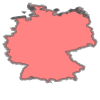

In [10]:
dataframe_germany = nuts0_shapes[nuts0_shapes['NUTS_ID'] == 'DE']
dataframe_germany.geometry.values[0]

Define a polygon with a list of latitude and longitude points.

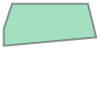

In [11]:
lat_point_list = [53, 53, 49, 48, 50]
lon_point_list = [4, 13, 14, 3, 3]

manual_polygon_geom = shapely.geometry.Polygon(zip(lon_point_list, lat_point_list))
manual_polygon_geom

Pack the polygon into a dataframe with one entry.

In [12]:
manual_polygon = gpd.GeoDataFrame(index=[0], crs={'init': 'epsg:4326'}, geometry=[manual_polygon_geom])
manual_polygon

,geometry
0,"POLYGON ((4 53, 13 53, 14 49, 3 48, 3 50, 4 53))"


Get all regions of NUTS code level 1 which intersect with the manually defined region:

In [13]:
region_selection = gpd.overlay(manual_polygon, nuts1_shapes, how='intersection')
list(region_selection['NUTS_ID'])

['DEC',
 'CZ0',
 'LU0',
 'DEB',
 'FRE',
 'BE3',
 'DE7',
 'BE1',
 'DEG',
 'DED',
 'BE2',
 'NL4',
 'DEA',
 'DEE',
 'NL3',
 'NL2',
 'DE4',
 'DE3',
 'DE9',
 'NL1',
 'FRC',
 'FRB',
 'DE1',
 'FR1',
 'FRF',
 'DE2']

In [14]:
selected_regions = nuts1_shapes[nuts1_shapes['NUTS_ID'].isin(region_selection['NUTS_ID'])]
selected_regions.head()

,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,FID,geometry
0,1,BE3,BE,RÃGION WALLONNE,BE3,"(POLYGON ((5.682 50.75745, 5.68973 50.75158, 5..."
2,1,DE1,DE,BADEN-WÃRTTEMBERG,DE1,"(POLYGON ((10.08372 49.54356, 10.08747 49.5375..."
4,1,DEA,DE,NORDRHEIN-WESTFALEN,DEA,"POLYGON ((8.703010000000001 52.50044, 8.699059..."
6,1,DE7,DE,HESSEN,DE7,"(POLYGON ((9.68533 51.58202, 9.690189999999999..."
9,1,DE4,DE,BRANDENBURG,DE4,"(POLYGON ((14.41216 53.32964, 14.41496 53.3233..."


In [15]:
# Plot those regions which previously intersected with the manually defined polygon
selected_regions.plot()

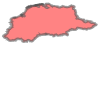

In [16]:
# Operation to merge all of those regions into one polygon
shapely.ops.cascaded_union(selected_regions['geometry'])

Join operation with pandas DataFrame with a NUTS code:

In [17]:
greece_subset = forecasts[forecasts['nuts_code'] == 'EL'][['nuts_code', 'valid_from', 'no_persons']]
result = pd.merge(greece_subset, nuts0_shapes[['NUTS_ID', 'geometry']], left_on='nuts_code', right_on='NUTS_ID')
result.head()

,nuts_code,valid_from,no_persons,NUTS_ID,geometry
0,EL,2019-09-14,9323,EL,"(POLYGON ((26.35788 41.7111, 26.36917 41.70811..."
1,EL,2019-09-13,8847,EL,"(POLYGON ((26.35788 41.7111, 26.36917 41.70811..."
2,EL,2019-09-06,7651,EL,"(POLYGON ((26.35788 41.7111, 26.36917 41.70811..."
3,EL,2019-09-19,5740,EL,"(POLYGON ((26.35788 41.7111, 26.36917 41.70811..."
4,EL,2019-08-28,6079,EL,"(POLYGON ((26.35788 41.7111, 26.36917 41.70811..."


In [37]:
population_nuts2_file = 'data/demo_r_d2jan.tsv'
population_nuts2 = pd.read_csv(population_nuts2_file, sep=',|\t', engine='python')

How is our dataset structured?

In [19]:
population_nuts2.head()

,unit,sex,age,geo\time,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,NR,F,TOTAL,AL,1431715,1423050,1417141,1424597,1430827,1437193,...,:,:,:,:,:,:,:,:,:,:
1,NR,F,TOTAL,AL0,1431715,1423050,1417141,1424597,1430827,1437193,...,:,:,:,:,:,:,:,:,:,:
2,NR,F,TOTAL,AL01,405598,405835,416845,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,NR,F,TOTAL,AL02,585530,574010,552949,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,NR,F,TOTAL,AL03,440587,443205,454906,:,:,:,...,:,:,:,:,:,:,:,:,:,:


Apparently we have a column for each available year.
We can filter by columns such as age, sex and geo\time (apparently a bad/mismatched column name).
Let's first filter for a region we're interested in.

In [20]:
population_nuts2[population_nuts2['geo\\time'] == 'DE'].head()

,unit,sex,age,geo\time,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
66,NR,F,TOTAL,DE,41948786,41824535,41661561,41362080,41210540,41142770,...,42032869,42065068,42057327,41992676,41893638,41819932,41674558,41435414,41253314,40995271
619,NR,F,UNK,DE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,NR,F,Y1,DE,388384,370820,359977,338900,333269,324398,...,395148,388011,375300,376901,390613,399158,410910,446897,435951,440429
1719,NR,F,Y10,DE,357375,346854,348360,350616,347814,351900,...,470400,459205,451244,433377,427643,428414,436015,430609,428867,399541
2269,NR,F,Y11,DE,349789,352305,356632,350910,353805,360084,...,459359,452387,435969,431157,431500,439898,435567,433400,405111,394033


Now, what possibilities to filter for *sex* or *age* do we have?

In [21]:
pd.unique(population_nuts2['sex'])

array(['F', 'M', 'T'], dtype=object)

In [22]:
pd.unique(population_nuts2['age'])

array(['TOTAL', 'UNK', 'Y1', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15',
       'Y16', 'Y17', 'Y18', 'Y19', 'Y2', 'Y20', 'Y21', 'Y22', 'Y23',
       'Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29', 'Y3', 'Y30', 'Y31',
       'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37', 'Y38', 'Y39', 'Y4',
       'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46', 'Y47', 'Y48',
       'Y49', 'Y5', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55', 'Y56',
       'Y57', 'Y58', 'Y59', 'Y6', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64',
       'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y7', 'Y70', 'Y71', 'Y72',
       'Y73', 'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y8', 'Y80',
       'Y81', 'Y82', 'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89',
       'Y9', 'Y90', 'Y91', 'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97',
       'Y98', 'Y99', 'Y_LT1', 'Y_OPEN'], dtype=object)

Now let's apply multiple filters to get some statistics for germany for all ages and sexes.

In [23]:
german_population = population_nuts2[(population_nuts2['geo\\time'] == 'DE') & (population_nuts2['age'] == 'TOTAL')  & (population_nuts2['sex'] == 'T')]
german_population

,unit,sex,age,geo\time,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
112474,NR,T,TOTAL,DE,82792351,82521653,82175684,81197537,80767463,80523746,...,82037011,82057379,82012162,81817499,81538603,81338091,80974645,80274587,79753180,79103532


We could further convert the row into a series and plot it.

In [24]:
del(german_population['unit'])
del(german_population['sex'])
del(german_population['age'])
del(german_population['geo\\time'])

In [25]:
german_population

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
112474,82792351,82521653,82175684,81197537,80767463,80523746,80327900,80222065 b,81802257,82002356,...,82037011,82057379,82012162,81817499,81538603,81338091,80974645,80274587,79753180,79103532


In [26]:
german_pop_series = german_population.melt(var_name='year', value_name='pop')
pd.to_numeric(german_pop_series['year'])
german_pop_series.head()

,year,pop
0,2018,82792351
1,2017,82521653
2,2016,82175684
3,2015,81197537
4,2014,80767463


Some rows have to be fixed. Further, we convert them to numeric values.

In [27]:
german_pop_series['pop'][7] = 80222065
german_pop_series['pop'] = pd.to_numeric(german_pop_series['pop'])
german_pop_series.sort_index(inplace=True)

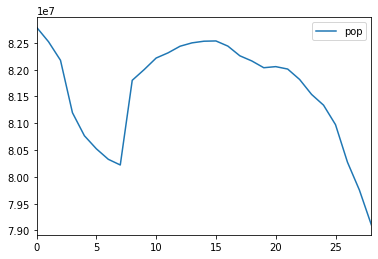

In [28]:
german_pop_series.set_index('year')
german_pop_series.plot()

# iPyWidgets
Interacting with functions through javascript widgets, integrated in your jupyter notebook.

In [29]:
def f(x):
    return x

ipywidgets.interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Now building a dropdown box with options obtained from the forecasts data set.
Then visualizing the head of the forecasts data for only a particular selected NUTS code region.

In [30]:
def show_data_for_nuts_code(code : str):
    return forecasts[forecasts['nuts_code'] == code].sort_values(by=['valid_from']).head()
    
available_nuts_codes = sorted(pd.unique(forecasts['nuts_code']))
widget_nuts_codes = ipywidgets.Dropdown(
    options=[code for code in available_nuts_codes],
    value=available_nuts_codes[0],
    description='Nuts Code:',
)
ipywidgets.interact(show_data_for_nuts_code, code=widget_nuts_codes)

interactive(children=(Dropdown(description='Nuts Code:', options=('AT', 'AT11', 'AT12', 'AT13', 'AT21', 'AT22'…

<function __main__.show_data_for_nuts_code(code: str)>

- The function ``show_data_for_nuts_code(code : str)`` filters the pandas dataframe for a given NUTS code. Furthermore, it sorts the results by the column *valid_from* and finally returns only the head of the result.
- The dropdown is a built-in widget of ipywidgets and takes *options* and a *value* as important arguments: those define possible options the user can select from and the initial selected value. We simply pass the uniquely available NUTS codes from our data set and sort them by name.
- Interaction with this function works the same way as before by linking the function and the dropdown widget via ``ipywidgets.interact()``

In [31]:
date_range_mask = (forecasts['valid_from'] > min(forecasts['valid_from'])) & (forecasts['valid_from'] <= max(forecasts['valid_from']))
forecasts[forecasts['nuts_code'] == 'AT'].loc[date_range_mask]

,uniqueid,_timestamp,source,no_persons,valid_from,valid_to,is_forecast,confidence_lower,confidence_upper,nuts_code
11,1438,2019-09-18,humdata_exercise,6900,2019-09-18,2020-12-31,False,NaN,NaN,AT
21,1420,2019-08-31,humdata_exercise,6500,2019-08-31,2020-12-31,False,NaN,NaN,AT
24,1440,2019-09-20,humdata_exercise,7478,2019-09-20,2020-12-31,False,NaN,NaN,AT
27,1406,2019-08-17,humdata_exercise,2700,2019-08-17,2020-12-31,False,NaN,NaN,AT
30,1435,2019-09-15,humdata_exercise,7691,2019-09-15,2020-12-31,False,NaN,NaN,AT
34,1426,2019-09-06,humdata_exercise,3767,2019-09-06,2020-12-31,False,NaN,NaN,AT
36,1443,2019-09-23,humdata_exercise,3465,2019-09-23,2020-12-31,False,NaN,NaN,AT
59,1448,2019-09-28,humdata_exercise,6351,2019-09-28,2020-12-31,False,NaN,NaN,AT
71,1411,2019-08-22,humdata_exercise,5861,2019-08-22,2020-12-31,False,NaN,NaN,AT
75,1417,2019-08-28,humdata_exercise,5280,2019-08-28,2020-12-31,False,NaN,NaN,AT


In [32]:
def show_selected_range(code : str, date_range):
    date_min = date_range[0].strftime('%Y-%m-%d')
    date_max = date_range[1].strftime('%Y-%m-%d')
    date_range_mask = (forecasts['valid_from'] > date_min) & (forecasts['valid_from'] <= date_max)
    return forecasts[forecasts['nuts_code'] == code].loc[date_range_mask].sort_values(by=['valid_from'])
    
available_nuts_codes = sorted(pd.unique(forecasts['nuts_code']))
widget_nuts_codes = ipywidgets.Dropdown(
    options=[code for code in available_nuts_codes],
    value=available_nuts_codes[0],
    description='Nuts Code:'
)

available_date_range = pd.date_range(start=min(forecasts['valid_from']), end=max(forecasts['valid_from']))
widget_date_range = ipywidgets.SelectionRangeSlider(
    options=available_date_range,
    value=(min(available_date_range), max(available_date_range)),
    description='Date Range',
    disabled=False,
    layout={'width': '500px'}
)

ipywidgets.interact(show_selected_range, code=widget_nuts_codes, date_range=widget_date_range)

interactive(children=(Dropdown(description='Nuts Code:', options=('AT', 'AT11', 'AT12', 'AT13', 'AT21', 'AT22'…

<function __main__.show_selected_range(code: str, date_range)>

# iPyLeaflet

In [33]:
map_layer = ipyleaflet.Map(center=(49, 10), zoom=4, basemap=ipyleaflet.basemaps.Hydda.Full, scroll_wheel_zoom=True)
map_layer.layout.height = '800px'
map_layer.layout.width = '90%'

In [34]:
map_layer

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

In [35]:
style={'color': 'red', 'fillColor': 'red', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.2}
hover_style={'fillColor': 'blue' , 'fillOpacity': 0.2}
map_layer.add_layer(ipyleaflet.GeoData(geo_dataframe = dataframe_germany, style=style, hover_style = hover_style))

In [36]:
map_layer.add_layer(ipyleaflet.GeoData(
    geo_dataframe=selected_regions,
    style={'color': 'orange'},
    hover_style=hover_style)
)